<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/IMT_plot_evolucao_ex1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/economy.csv.csv')
df.head()

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389
3,AG,1.727759e+09,17790.0,NaN
4,AL,1.527808e+10,5352.0,0.621


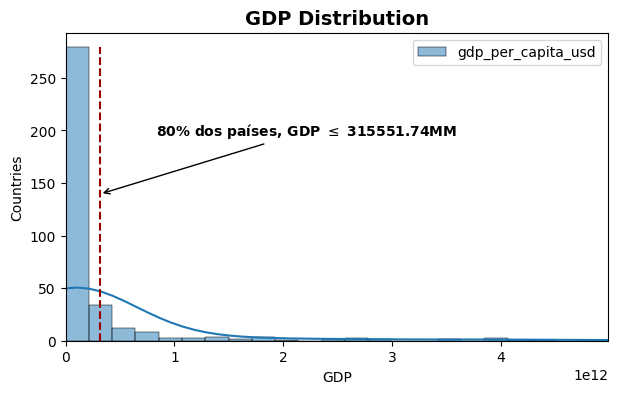

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

h = sns.histplot(df['gdp_usd'], kde=True, label=col, ax=ax, alpha=0.5, bins=100)

# Customize the plot
ax.set_xlabel("GDP")
ax.set_ylabel("Countries")
ax.set_title("GDP Distribution",fontsize=14,weight='bold')
ax.set_xlim([0,df['gdp_usd'].quantile(0.98)])
ax.vlines(df['gdp_usd'].quantile(0.8),0,h.patches[0].get_height(),color=(0.6, 0.0, 0.0),linestyles='--')

ax.legend()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.annotate('80% dos países, GDP $\leq$ ' + str(np.round(df['gdp_usd'].quantile(0.8)/1000000,2)) + 'MM',
             xy=(df['gdp_usd'].quantile(0.8), h.patches[0].get_height()/2),                # ponto do gráfico
             xytext=((xmax - xmin)/6,2/3*(ymax - ymin)),           # posição do texto
             arrowprops=dict(arrowstyle="->"),
             weight='bold')

plt.show()